## Titanic 02 Template for Exploratory Data Analysis 
#### Writting formulas & Plotting.

### 1. Load python packages used

In [1]:
# Basic libs
import pandas as pd
import numpy as np
# Loading the plotting libraries.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from IPython.display import display, HTML
from IPython.display import Math, Latex

### 2. Drawing Formulas

In [2]:
Math(r'F(k) = \int_{-\infty}^{\infty} log(x) . f(x) e^{2\pi k} dx')

<IPython.core.display.Math object>

In [3]:
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

### 2. Loading the data.

In [4]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

### 3. Color Table to use in the plottings.

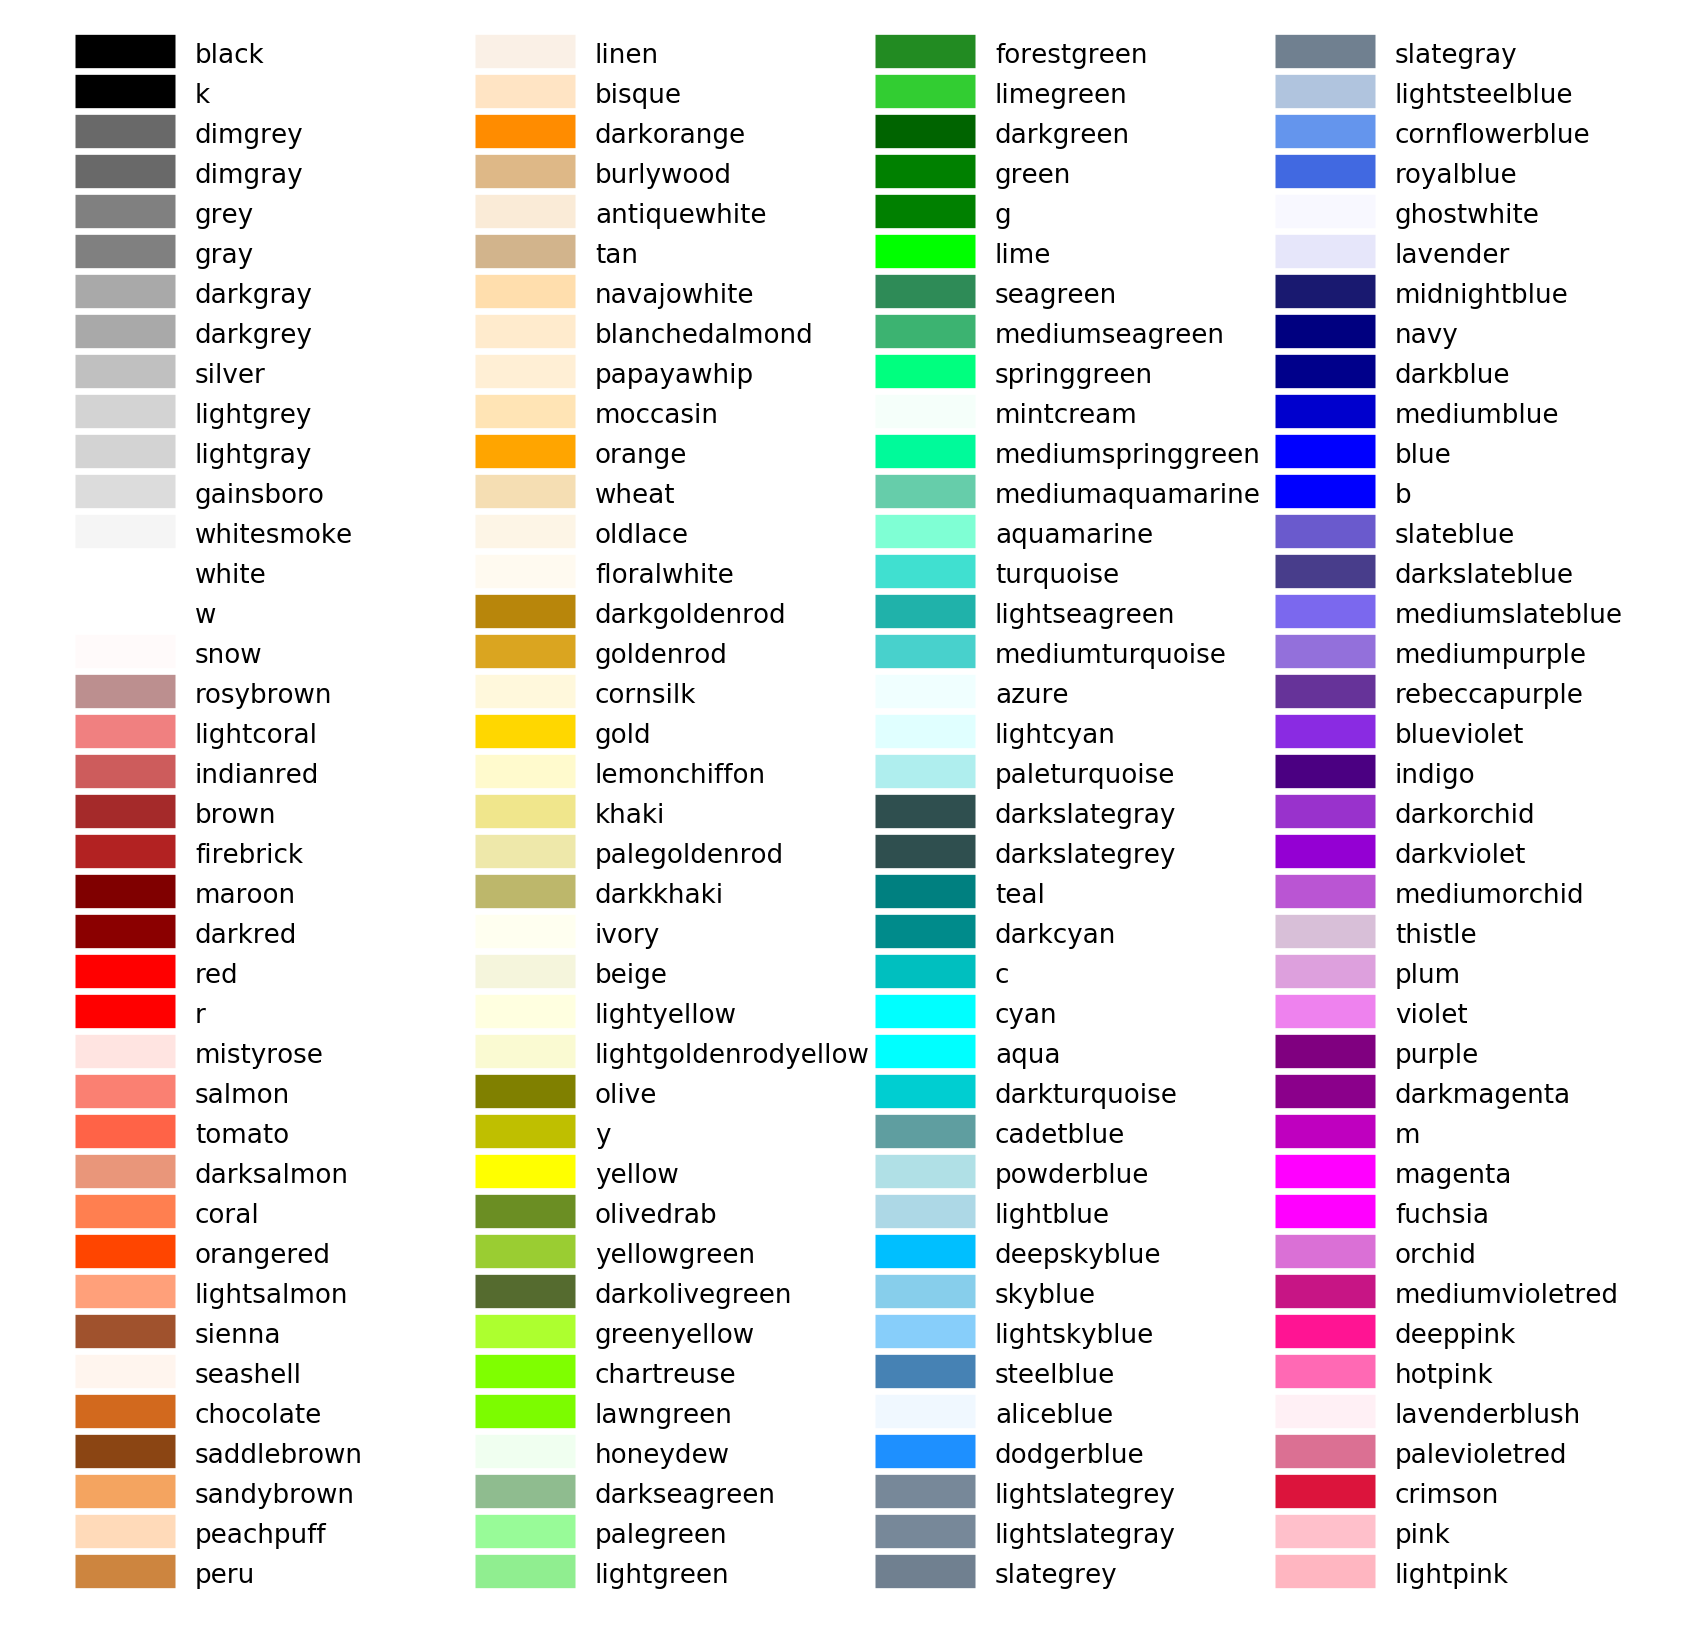

### 5. Palettes = collection of related colors.

https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

### 6. Exploring and Questions.

#### 6.1. How Age influences the survival of Male and Female.

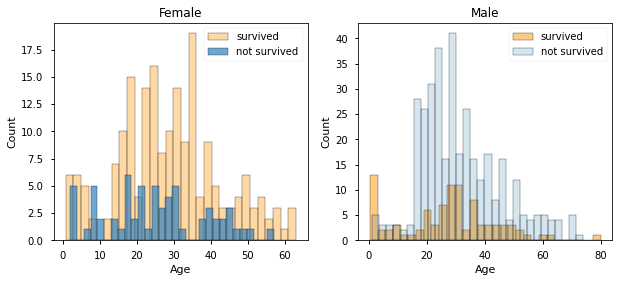

In [5]:
survived = 'survived'
not_survived = 'not survived'
female = train_df[train_df['Sex']=='female']
male = train_df[train_df['Sex']=='male']
# --- Graphs ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = sns.histplot(female[female['Survived']==1].Age.dropna(), bins=30, 
                  label=survived, 
                  ax=axes[0], # First plot
                  kde=False, color="#feb24c", alpha=0.5)
ax = sns.histplot(female[female['Survived']==0].Age.dropna(), bins=30, 
                  label = not_survived, ax = axes[0], kde =False,
                  color="#3182bd", alpha=0.7)
ax.legend()
ax.set_title('Female')

ax = sns.histplot(male[male['Survived']==1].Age.dropna(), bins=30, 
                  label = survived, 
                  ax = axes[1], # Second plot
                  kde = False, color="#feb24c", alpha=0.7)
ax = sns.histplot(male[male['Survived']==0].Age.dropna(), bins=30, 
                  label = not_survived, ax = axes[1], kde = False,
                  color="#3182bd", alpha=0.2)
ax.legend()
_ = ax.set_title('Male')

#### 6.2. How passenger Age is distributed accross Passenger Classes

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

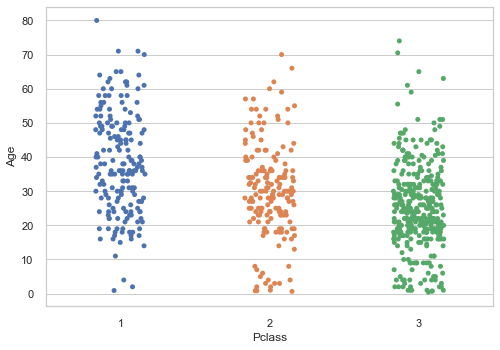

In [6]:
sns.set(style="whitegrid",color_codes=True)
sns.stripplot(x="Pclass", y="Age", data=train_df, jitter=0.17, dodge=True)
              # markers=["o", "s", "D"])
    

#### 6.3 How passenger Age is distributed accross Ticket Classes (Another view)

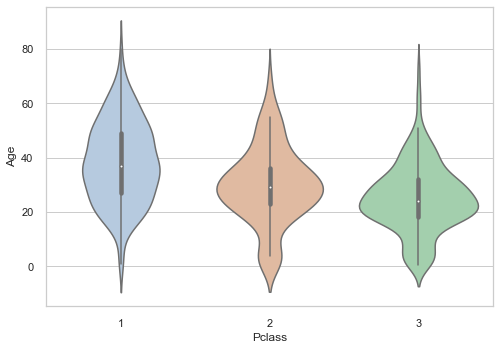

In [7]:
ax = sns.violinplot(x="Pclass", y="Age", palette='pastel', data=train_df, saturation=0.5)


#### 6.4 Survivability distribution accross Enbarked, Passenger Class and Gender.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

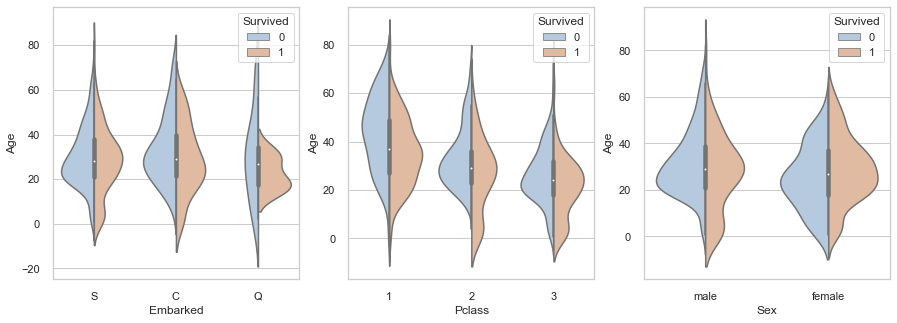

In [8]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(
    x="Embarked", y="Age", hue="Survived", data=train_df, split=True, ax=ax1, 
    palette='pastel', saturation=0.5)
sns.violinplot(
    x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax=ax2,
    palette='pastel', saturation=0.5)
sns.violinplot(
    x="Sex", y="Age", hue="Survived", data=train_df, split=True, ax=ax3,
    palette='pastel', saturation=0.5)

#### 6.4. How many people embarked from different ports? 
Is there a correlation between port of embarkment and survival?

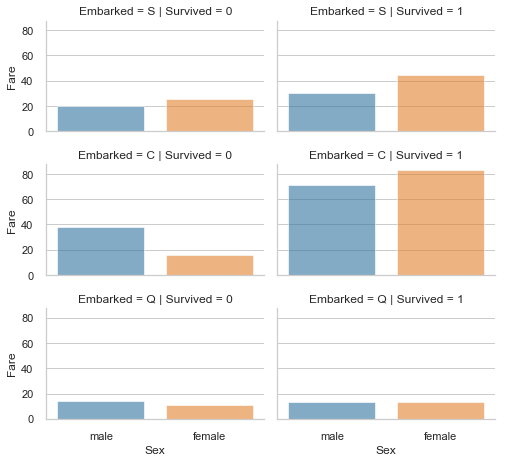

In [9]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', 
         order=["male", "female"],
         palette="tab10",
         alpha=.6, ci=None)
grid.add_legend()

#### 6.5. How the port of embarcation relates with Ticket class?

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

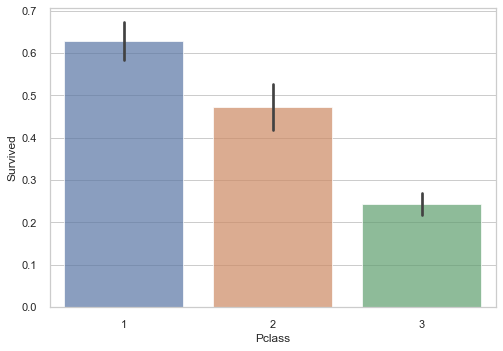

In [10]:
comb = pd.concat([train_df, train_df])
sns.barplot(x='Pclass', y='Survived', data=comb, alpha=.7)

#### 6.6. How the passenger Age relates to the Survival.

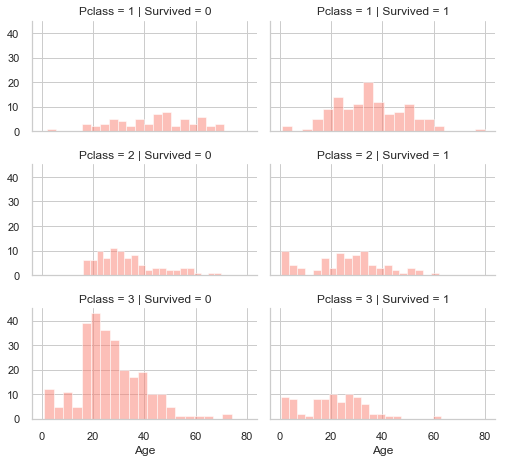

In [11]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', color="salmon", alpha=.5, bins=20)
grid.add_legend();

#### 6.7. How passenger age relates with Survival and Not Survival

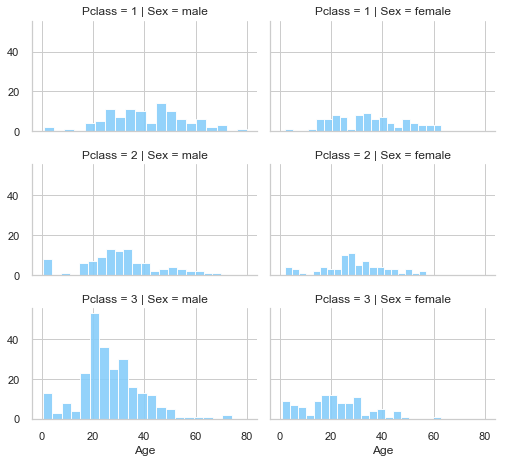

In [12]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', color="lightskyblue", alpha=.9, bins=20)
grid.add_legend()

#### 6.8. How ticket price affects survival of each gender?

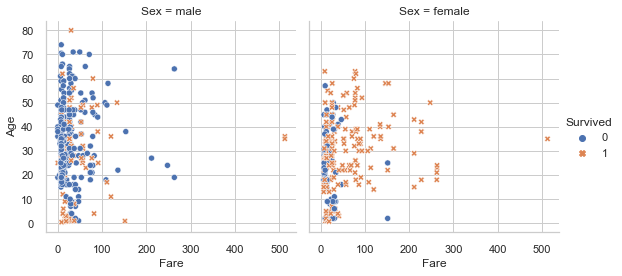

In [13]:
sns.relplot(
    x="Fare", y="Age", hue="Survived", style="Survived",
    col="Sex", data=train_df, height=4);

#### 6.9. Does the size of the group influences chances of survival?

In [14]:
def header(title, width=100):
    fmt_title = title + '&nbsp;' * (width - len(title))
    tpl = '<table style="width:{width}"><tr><th>{title}</th></tr></table>'
    html = tpl.format(title=fmt_title, width=width)
    return HTML(html)


data = [(' Train', train_df), (' Test', test_df)]
for label, dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'alone'] = 'Yes'
    counted = dataset['alone'].value_counts().to_frame()
    display(header(label, 70))
    display(counted)


Train


,alone
Yes,537
No,354


Test


,alone
Yes,253
No,165


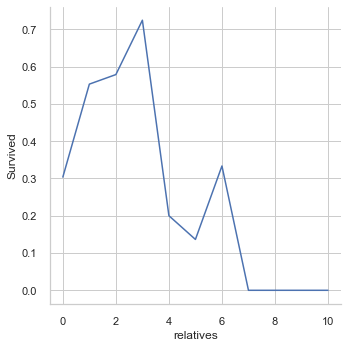

In [15]:
axes = sns.relplot(x="relatives", y="Survived", kind="line", ci=None, data=train_df)


#### 6.10. Feature engineering

In [16]:
# Using regex in python
import re
def extract_cabin_prefix(cabin): 
    return re.compile("([a-zA-Z])").search(cabin).group()

print(extract_cabin_prefix('U1223'))
print(extract_cabin_prefix('A 13'))


U
A


##### 6.10.1 Deck Variable

In [17]:
# Creating a new field 'Deck'
new_train = train_df
new_test = test_df
data = [new_train, new_test]

# Mapping first char to a specific location in the boat.
decks = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
def get_deck(cabin): 
    prefix = extract_cabin_prefix(cabin)
    return decks.get(prefix, 0)

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")   # Setting U0 Cabin if unknown.
    dataset['Deck'] = dataset['Cabin'].map(get_deck)
    dataset['Deck'] = dataset['Deck'].astype(int)
# Drop the 'cabin' column as we already extracted Deck.
new_train = new_train.drop(['Cabin'], axis=1)
new_test = new_test.drop(['Cabin'], axis=1)

In [18]:
import re
# M;apping first char to a specific location in the boat.
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
new_train = train_df
new_test = test_df
data = [new_train, new_test]

def extract_letter_prefix(x):
    return re.compile("([a-zA-Z]+)").search(x).group()

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")   # Setting U0 Cabin if unknown.
    dataset['Deck'] = dataset['Cabin'].map(extract_letter_prefix)
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# Drop the cabin as we already extracted Deck.
new_train = new_train.drop(['Cabin'], axis=1)
new_test = new_test.drop(['Cabin'], axis=1)


In [19]:
display(HTML(new_train.head(10).to_html()))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,No,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,1,No,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Yes,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,No,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Yes,8
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0,Yes,8
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,Yes,5
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,No,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,No,8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,No,8



#### 6.10.2 Fixing the Age variable.

In [20]:
# Populate the age with a random distribution centered on 'mean' value with 'std' spread.
data = [new_train,  new_test]

for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    # Only assign ages larger than 5.
    rand_age = np.maximum([5], np.random.randint(mean - std, mean + std, size = is_null)) 
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)


#### 6.10.2 Fixing the Embarked variable

In [21]:
# Complete with most common value.
# common_value = 'S'
common_value = new_train['Embarked'].value_counts().idxmax()
print('Most common Port: {0}'.format(common_value))

print('--- Train before ---')
print(new_train['Embarked'].describe())
new_train['Embarked'] = new_train['Embarked'].fillna(common_value)
print('--- Train after  ---')
print(new_train['Embarked'].describe())

Most common Port: S
--- Train before ---
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
--- Train after  ---
count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


#### 6.10.3. Dropping records in test data with NA in the Embark field.

In [22]:
# If there are Empty 'Embarked' fields in the test we should drop the record.
print(' ')
print('--- Test Data  ---')
print('Before and after removing NAs')
print('# Recs before: {0}'.format(new_test.shape[0]))
new_test = new_test[new_test['Embarked'].notna()]
print('# Recs after : {0}'.format(new_test.shape[0]))


 
--- Test Data  ---
Before and after removing NAs
# Recs before: 418
# Recs after : 418


#### 6.10.4 Adjusting the fare feature

In [23]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  alone        891 non-null    object 
 13  Deck         891 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 97.6+ KB


Fare:
Converting “Fare” from float to int64, using the “astype()” function pandas provides:

In [24]:
print('--- Train  ---')
print('Set train Fare to average fare')
mean_fare = dataset["Fare"].mean()
new_train['Fare'] = new_train['Fare'].fillna(mean_fare).astype(int)

print(' ')
print('--- Drop test records with empty Fare ---')
print('# Recs before: {0}'.format(new_test.shape[0]))
new_test = new_test[new_test['Fare'].notna()]
new_test['Fare'] = new_test['Fare'].astype(int)
print('# Recs after : {0}'.format(new_test.shape[0]))


--- Train  ---
Set train Fare to average fare
 
--- Drop test records with empty Fare ---
# Recs before: 418
# Recs after : 417


#### 6.10.5 Feature Family Size.

In [25]:
data = [new_train,  new_test]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

def format_percent(value):
    return '{:,.1f}'.format(value * 100)

grouped = new_train[['FamilySize', 'Survived']].groupby(
    ['FamilySize'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)
grouped['Survived'] = grouped['Survived'].map(format_percent)

tabulated = grouped.rename(columns={
    'FamilySize': 'Family Size', 'Survived': '% Survided'})
tabulated.style.hide_index()


/var/folders/2y/hm3jg6812nd_sktsrjdq0l2m0000gn/T/ipykernel_58423/2484707771.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  tabulated.style.hide_index()


Family Size,% Survided
4,72.4
3,57.8
2,55.3
7,33.3
1,30.4
5,20.0
6,13.6
8,0.0
11,0.0


#### 6.10.6 Feature 'Port of embarkation'

In [26]:
def get_port_name(code):
    ports = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
    return ports.get(code, '<Unknown>')


group_embarked = new_train[['Embarked', 'Survived']].groupby(
    ['Embarked'], as_index=False).mean().sort_values(
        by='Survived', ascending=False)
group_embarked['Survived'] = group_embarked['Survived'].map(format_percent)
group_embarked['Embarked'] = group_embarked['Embarked'].map(get_port_name)

tabulated = group_embarked.rename(columns={
    'Embarked': 'Port of embarkation', 'Survived': '% Survided'})
tabulated.style.hide_index()

/var/folders/2y/hm3jg6812nd_sktsrjdq0l2m0000gn/T/ipykernel_58423/260266101.py:14: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  tabulated.style.hide_index()


Port of embarkation,% Survided
Cherbourg,55.4
Queenstown,39.0
Southampton,33.9


#### 6.10.7 Creating a new feature 'IsAlone'

In [27]:
def get_is_alone_str(is_alone):
    values = {0: 'No', 1: 'Yes'}
    return values.get(is_alone, '<Unknown>')


new_train['IsAlone'] = 0
new_train.loc[new_train['FamilySize'] == 1, 'IsAlone'] = 1

group_is_alone = new_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
group_is_alone['Survived'] = group_is_alone['Survived'].map(format_percent)
group_is_alone['IsAlone'] = group_is_alone['IsAlone'].map(get_is_alone_str)
tabulated = group_is_alone.rename(columns={
    'IsAlone': 'Is passenger alone', 'Survived': '% Survided'})
tabulated.style.hide_index()

/var/folders/2y/hm3jg6812nd_sktsrjdq0l2m0000gn/T/ipykernel_58423/1814365102.py:14: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  tabulated.style.hide_index()


Is passenger alone,% Survided
No,50.6
Yes,30.4


### 7. Additional Plottings.

#### 7.1 Correlation of variables in the dataframe.

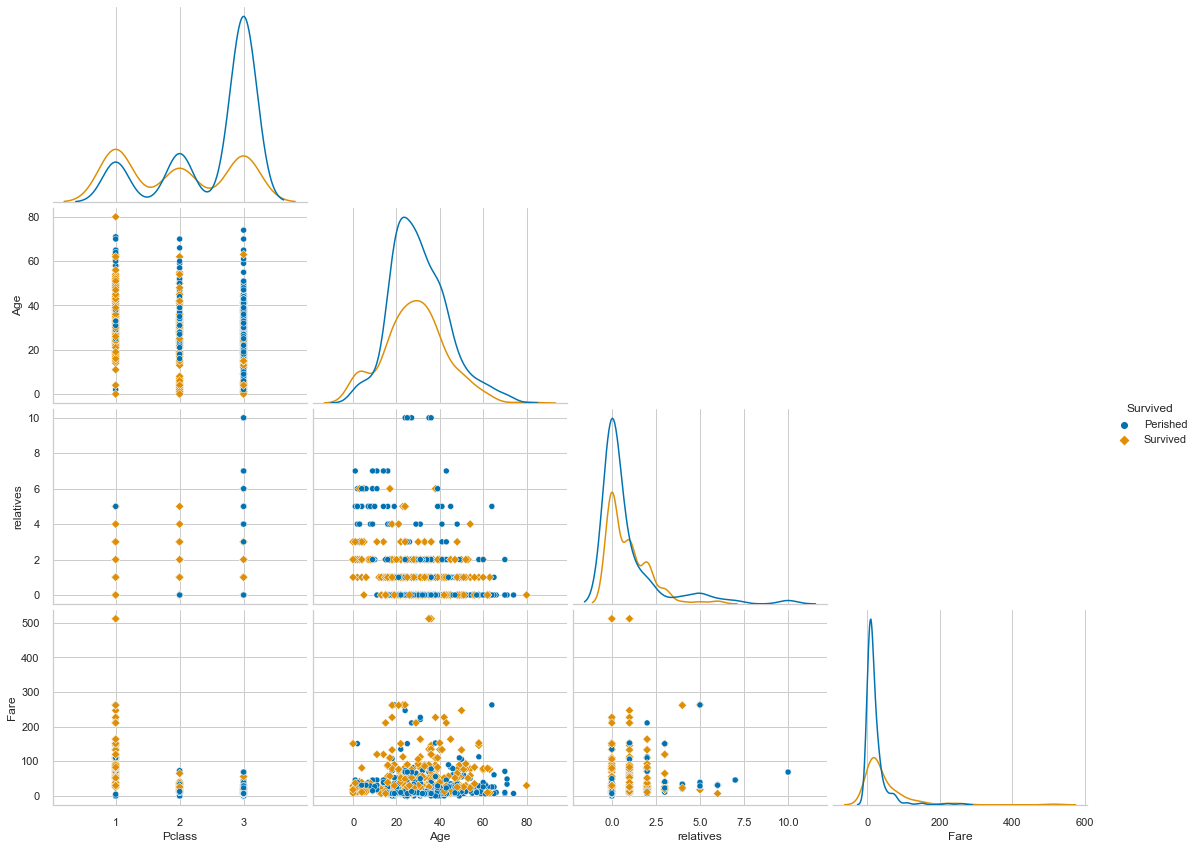

In [28]:
pairs_df = new_train[
    ['Pclass', 'Age', 'relatives', 'Fare', 'Survived']].copy()
survived_map =  {0: 'Perished', 1: 'Survived'}
pairs_df['Survived'] = pairs_df['Survived'].map(survived_map)
sns.pairplot(pairs_df, palette='colorblind', hue='Survived', corner=True,
             diag_kws=dict(fill=False), markers=["o", "D"], height=3, aspect=1.3) 

#### 7.2. Create a 'Heatmap' plot

In [29]:
# Numeric Features
numeric_features = ['Age', 'Fare']
# Categorical Features
ordinal_features = ['Pclass', 'SibSp', 'Parch']
nominal_features = ['Sex', 'Embarked']

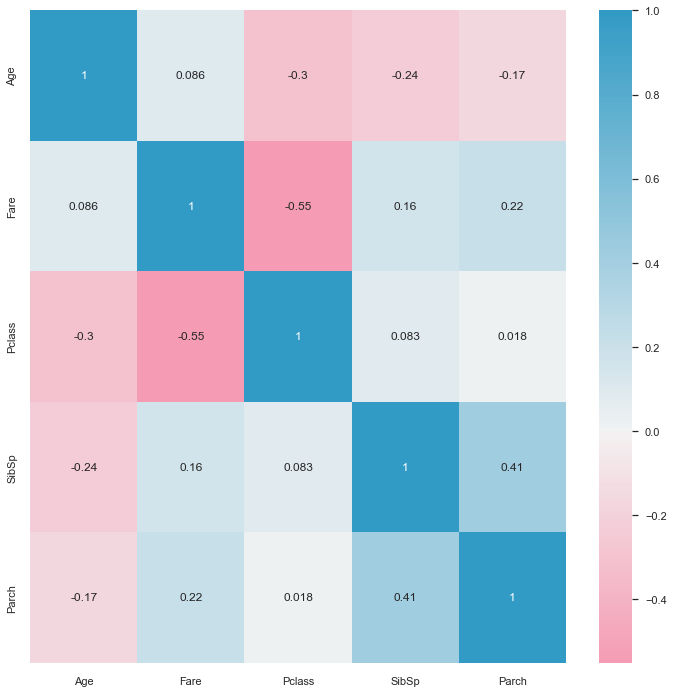

In [30]:
cor_matrix = new_train[numeric_features + ordinal_features].corr().round(3)
# Draw a heatmap 
fig = plt.figure(figsize=(12,12));
sns.heatmap(cor_matrix, annot=True, center=0, 
            cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True),
            ax=plt.subplot(111));
plt.show()

### 8. Model Building

In [31]:
# ML Libs
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import cross_validate, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
# Make sure we get reproducible results.
import random
random.seed(1234)

def model_x_df(df):
    predictors = ['Pclass', 'Age', 'Parch', 'Fare', 'relatives']
    data_x = df[predictors].copy()
    data_sex_x = pd.get_dummies(df.Sex, prefix='sex')
    data_alone_x = pd.get_dummies(df.alone, prefix='alone')
    data_embarked_x = pd.get_dummies(df.Embarked, prefix='emb')
    data_deck_x = pd.get_dummies(df.Deck, prefix='deck')
    result = pd.concat(
        [data_x, data_sex_x, data_alone_x, data_embarked_x, data_deck_x], axis=1)
    required_fields = [
        'Pclass', 'Age', 'Parch', 'Fare', 'relatives', 
        'sex_female', 'sex_male',
        'alone_No', 'alone_Yes', 
        'emb_C', 'emb_Q', 'emb_S', 
        'deck_0', 'deck_1', 'deck_2', 'deck_3', 'deck_4', 
        'deck_5', 'deck_6', 'deck_7', 'deck_8']
    for req_field in required_fields:
        if req_field not in result.columns:
             result[req_field] = 0
    # Make sure the fields are ordered the same way.
    return result[required_fields]

def model_y_1d(df):
    return df['Survived'].values.ravel()

train_x = model_x_df(new_train)
train_y = model_y_1d(new_train)

test_x = model_x_df(new_test)
test_y = model_y_1d(new_test)

print(train_x.shape)
print(test_x.shape)

(891, 21)
(417, 21)


In [34]:
train_x.head(10)

,Pclass,Age,Parch,Fare,relatives,sex_female,sex_male,alone_No,alone_Yes,emb_C,...,emb_S,deck_0,deck_1,deck_2,deck_3,deck_4,deck_5,deck_6,deck_7,deck_8
0,3,22,0,7,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,38,0,71,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3,26,0,7,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35,0,53,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,3,35,0,8,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
5,3,15,0,8,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,54,0,51,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
7,3,2,1,21,4,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8,3,27,2,11,2,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
9,2,14,0,30,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [35]:
train_x.columns

Index(['Pclass', 'Age', 'Parch', 'Fare', 'relatives', 'sex_female', 'sex_male',
       'alone_No', 'alone_Yes', 'emb_C', 'emb_Q', 'emb_S', 'deck_0', 'deck_1',
       'deck_2', 'deck_3', 'deck_4', 'deck_5', 'deck_6', 'deck_7', 'deck_8'],
      dtype='object')

In [36]:
test_x.columns

Index(['Pclass', 'Age', 'Parch', 'Fare', 'relatives', 'sex_female', 'sex_male',
       'alone_No', 'alone_Yes', 'emb_C', 'emb_Q', 'emb_S', 'deck_0', 'deck_1',
       'deck_2', 'deck_3', 'deck_4', 'deck_5', 'deck_6', 'deck_7', 'deck_8'],
      dtype='object')

In [37]:
import random
random.seed(2022)

basic_model = RandomForestClassifier(random_state = 1)
basic_fit = basic_model.fit(train_x, train_y)

In [38]:
def print_score(title, mean_score):
    print('{0} = {1:.1f}%'.format(title, mean_score*100))

In [39]:
# Basic - Cross Validation without optimization
cv_scores = cross_val_score(basic_fit, train_x, train_y, cv=5)
print(cv_scores)
print(' ')
print_score('Simple Cross-Validation Score', cv_scores.mean())

[0.78212291 0.76404494 0.81460674 0.74719101 0.82022472]
 
Simple Cross-Validation Score = 78.6%


In [40]:
# The test score for the model without optimization.
# Notice that as expected the score for testing is a little smaller than the score for training.
test_score = basic_fit.score(test_x, test_y)
print('Most important score!')
print_score('Test Score', test_score)

Most important score!
Test Score = 71.0%


In [41]:
# Grid Search to find the best Hyper parameters
param_name = 'max_depth'
param_range = [5, 8, 10, 15]
train_scores, cv_test_scores = validation_curve(
    RandomForestClassifier(),
    X = train_x, y = train_y, 
    param_name = param_name, 
    param_range = param_range, cv = 5)

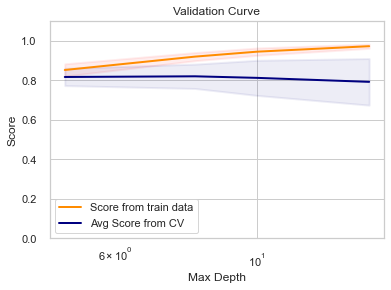

In [42]:
def plot_curve(train_scores, test_scores, title):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    cv_test_scores_mean = np.mean(cv_test_scores, axis=1)
    cv_test_scores_std = np.std(cv_test_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel(title) 
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Score from train data",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, 
                     train_scores_mean - (3 * train_scores_std) ,
                     train_scores_mean + (3 * train_scores_std) , alpha=0.07,
                     color="red", lw=lw)
    plt.semilogx(param_range, cv_test_scores_mean, label="Avg Score from CV",
                 color="navy", lw=lw)
    plt.fill_between(param_range, cv_test_scores_mean - (3 * cv_test_scores_std),
                     cv_test_scores_mean + (3 * cv_test_scores_std), alpha=0.07,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    
plot_curve(train_scores, cv_test_scores, "Max Depth")

In [43]:
def report_best_params(title, bestFit):
    prms = bestFit.best_params_
    spacer = '-' * 40
    print(spacer)
    print(title)
    print(spacer)
    print('  Best Hyperparameter Combination')
    print('  Max Depth = {0}'.format(prms['max_depth']))
    print('  Min Samples Leaf  = {0}'.format(prms['min_samples_leaf']))
    print('  Min Samples Split = {0}'.format(prms['min_samples_split']))
    print('  Number of Estimators = {0}'.format(prms['n_estimators']))


In [44]:
import random
random.seed(2022)
hyperF = dict(
    n_estimators = [700, 800, 900, 1000, 1100], 
    max_depth = [5, 8, 10, 15],  
    min_samples_split = [2, 3, 4, 5, 10, 15, 20], 
    min_samples_leaf = [2, 5, 8, 12])
forest = RandomForestClassifier(random_state = 1)
gridF1 = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF1 = gridF1.fit(train_x, train_y)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits


In [45]:
report_best_params('First Grid Search', bestF1)    

----------------------------------------
First Grid Search
----------------------------------------
  Best Hyperparameter Combination
  Max Depth = 8
  Min Samples Leaf  = 2
  Min Samples Split = 10
  Number of Estimators = 1100


In [48]:
import random
random.seed(2022)
hyperF = dict(
    max_depth = [6, 7, 8, 9, 10],  
    min_samples_leaf = [2, 3, 4, 5],
    min_samples_split = [8, 10, 12],
    n_estimators = [950, 1000, 1050, 1100, 1150, 1200, 1250]
)
forest = RandomForestClassifier(random_state = 1)
gridF2 = GridSearchCV(forest, hyperF, cv = 5, verbose = 1, n_jobs = -1)
bestF2 = gridF2.fit(train_x, train_y)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


In [49]:
report_best_params('Second pass', bestF2)  

----------------------------------------
Second pass
----------------------------------------
  Best Hyperparameter Combination
  Max Depth = 10
  Min Samples Leaf  = 4
  Min Samples Split = 8
  Number of Estimators = 1250


In [50]:
prms = bestF2.best_params_
rf_model_final = RandomForestClassifier(
    random_state = 1, 
    max_depth = prms['max_depth'],
    n_estimators = prms['n_estimators'],
    min_samples_split = prms['min_samples_split'],
    min_samples_leaf = prms['min_samples_leaf'])
random_forest = rf_model_final.fit(train_x, train_y)
train_scores = cross_val_score(random_forest, train_x, train_y, cv=5)
print_score('CV score after Grid Seach', train_scores.mean())

CV score after Grid Seach = 82.4%


In [51]:
test_score = random_forest.score(test_x, test_y)
print('Final score after optimization')
print_score('Test Score', test_score)

Final score after optimization
Test Score = 75.5%
